In [1]:
import pandas as pd
import sqlite3

# Exercise 02 : Bar


In [2]:
con = sqlite3.connect('data/checking-logs.sqlite')

In [22]:
# Получаем фрейм с временами
query = """
SELECT timestamp AS commits_time
FROM checker
WHERE uid LIKE 'user_%'
"""
commits_df = pd.read_sql(query, con)
commits_df['commits_time'] = pd.to_datetime(commits_df['commits_time'])

commits_df

,commits_time
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [23]:
# Разделяем на дату и время
commits_df['date'] = commits_df['commits_time'].dt.date
commits_df['hour'] = commits_df['commits_time'].dt.hour
commits_df['minute'] = commits_df['commits_time'].dt.minute

commits_df.drop(columns=['commits_time'], inplace=True)
commits_df

,date,hour,minute
0,2020-04-17,5,19
1,2020-04-17,5,22
2,2020-04-17,5,22
3,2020-04-17,5,34
4,2020-04-17,5,34
...,...,...,...
3202,2020-05-21,20,19
3203,2020-05-21,20,22
3204,2020-05-21,20,22
3205,2020-05-21,20,37


In [26]:
# Определяем время суток
daytime_intervals = [0, 4, 10, 17, 24]
daytimes = ['night', 'morning', 'afternoon', 'evening']

commits_df['daytime'] = pd.cut(commits_df['hour'] + commits_df['minute'] / 60, bins=daytime_intervals, labels=daytimes, right=False)
commits_df

,date,hour,minute,daytime
0,2020-04-17,5,19,morning
1,2020-04-17,5,22,morning
2,2020-04-17,5,22,morning
3,2020-04-17,5,34,morning
4,2020-04-17,5,34,morning
...,...,...,...,...
3202,2020-05-21,20,19,evening
3203,2020-05-21,20,22,evening
3204,2020-05-21,20,22,evening
3205,2020-05-21,20,37,evening


In [36]:
df = commits_df.groupby(['date', 'daytime'], observed=False).size().unstack()
df

daytime,night,morning,afternoon,evening
date,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,33,35
2020-04-19,2,4,16,11
2020-04-20,0,0,12,13
2020-04-21,0,0,0,25
2020-04-22,0,0,4,24
2020-04-23,2,6,15,20
2020-04-24,0,0,4,12
2020-04-25,1,21,33,49


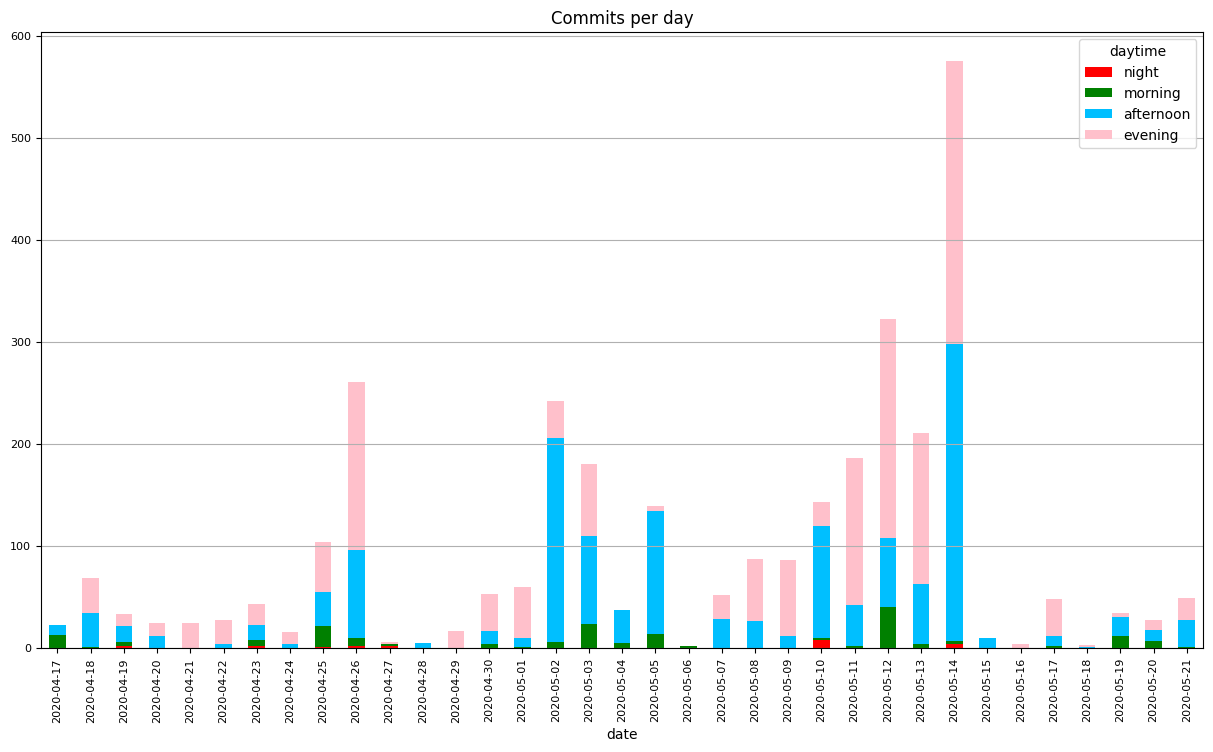

In [48]:
ax = df.plot(kind='bar', color=['red', 'green', '#00BFFF', 'pink'], 
        figsize=(15, 8), fontsize=8, title='Commits per day',
        stacked=True
       )
ax.yaxis.grid(True)

## at the end of your Jupyter Notebook, create a markdown cell and insert the questions:

- “When do our users usually commit the labs: in the night, morning, afternoon, or evening?”, the answer is the two most common periods.
- Which day has:
    - the most number of commits
    - and at the same time, the number of commits in the evening is higher than in the afternoon?

_“When do our users usually commit the labs: in the night, morning, afternoon, or evening?”, the answer is the two most common periods._

**Answer: evening and afternoon**

*Which day has:
the most number of commits*
*and at the same time, the number of commits in the evening is higher than in the afternoon?*

**Answer: 2020-05-14**

In [49]:
con.close()